# Assignment 2
# Classification

**Q.** The SUV dataset is given:

1. Read the dataset to the python environment.
2. Do necessary pre-processing steps.
3. Find out which classification model gives the best result to predict whether a customer will purchase the car (Use Logistic Regression, KNN, Naïve Bayes and SVM models).


### Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

import warnings
warnings.filterwarnings('ignore')

### Data Loading

In [2]:
df = pd.read_csv('suv_data.csv')
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [4]:
df['Gender'].unique()

array(['Male', 'Female'], dtype=object)

In [5]:
df['Purchased'].unique()

array([0, 1], dtype=int64)

**Inferences:**

* There are 400 rows in the dataset.
* No null values are there.
* 5 columns are there.
* Except gender which is an object data type, all others are of integer data type.
* Gender feature having only 2 unique values, Male and Female.
* Purchased feature have 2 class, o and 1.

### Data Preprocessing

#### Checking Outliers:

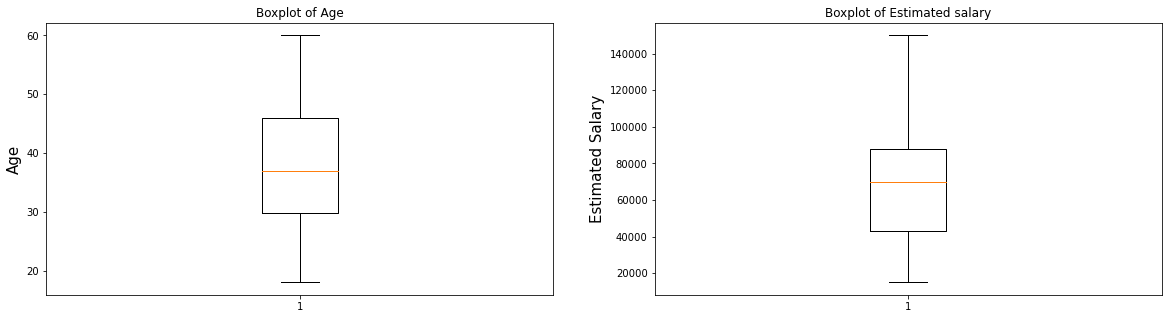

In [6]:
plt.figure(figsize = (20,5))
plt.subplot(1,2,1)
plt.boxplot(df['Age'])
plt.ylabel('Age', fontsize = 15)
plt.title('Boxplot of Age')

plt.subplot(1,2,2)
plt.boxplot(df['EstimatedSalary'])
plt.ylabel('Estimated Salary', fontsize = 15)
plt.title('Boxplot of Estimated salary')

plt.show()

#### Checking Duplicates:

In [7]:
df.duplicated(subset = 'User ID').unique()

array([False])

**Findings:**

* These two features have no outliers.
* The data set have no duplicate values.

#### Label Encoding (Gender Column):

In [8]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
df['Gender']= le.fit_transform(df['Gender'])
  
df['Gender'].unique()

array([1, 0])

In [9]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


**Note:**

Gender Column is label encoded as:

* Male:1
* Female: 0

### Data Vizualisation

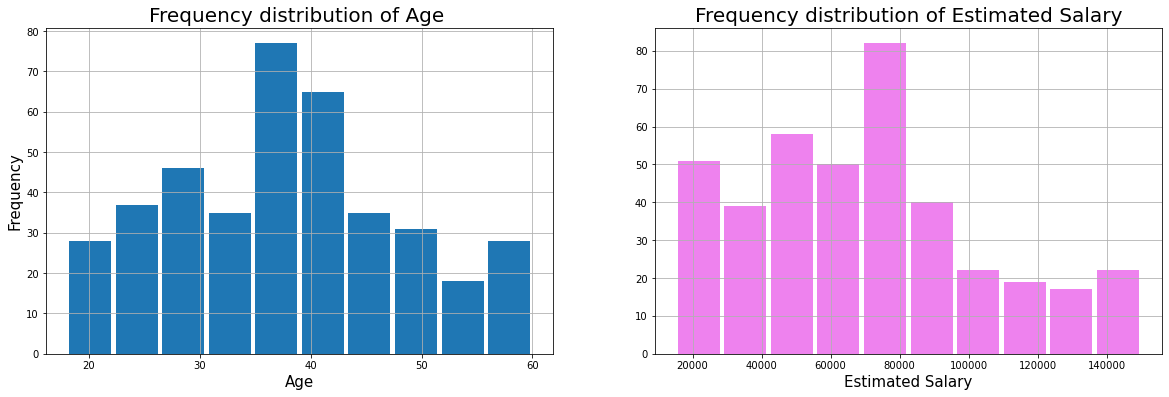

In [10]:
plt.figure(figsize = (20,6))

plt.subplot(1,2,1)
plt.hist(df['Age'],rwidth = 0.9)
plt.title('Frequency distribution of Age ',fontsize = 20)
plt.xlabel('Age',fontsize = 15)
plt.ylabel('Frequency',fontsize = 15)
plt.grid()

plt.subplot(1,2,2)
plt.hist(df['EstimatedSalary'],rwidth = 0.9,color = 'Violet')
plt.title('Frequency distribution of Estimated Salary',fontsize = 20)
plt.xlabel('Estimated Salary',fontsize = 15)
plt.grid()

plt.show()

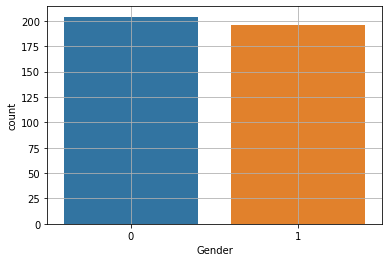

In [11]:
sns.countplot(df['Gender'])

plt.grid()

**Findings:**

* Label 0 denotes Female, which is greater in number than that of Male (1).
* Majority of them in the dataset having the age is around 40.

### Model Building

In [12]:
x = df.iloc[:,[1,2,3]]
y = df.iloc[:,4]

In [13]:
from sklearn.model_selection import train_test_split  
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.20, random_state = 0)

##### Scaling of data (of training data):

In [14]:
from sklearn.preprocessing import StandardScaler 
sc = StandardScaler()  
x_train = sc.fit_transform(x_train)   
x_test = sc.transform(x_test)

#### Logistic Regression Model

In [15]:
from sklearn.linear_model import LogisticRegression
model_lr = LogisticRegression()

In [16]:
model_lr.fit(x_train, y_train)

LogisticRegression()

In [17]:
y_pred = model_lr.predict(x_test)

In [18]:
print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.9125
Confusion Matrix:
 [[56  2]
 [ 5 17]]
Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.97      0.94        58
           1       0.89      0.77      0.83        22

    accuracy                           0.91        80
   macro avg       0.91      0.87      0.89        80
weighted avg       0.91      0.91      0.91        80



#### KNN Model

Text(0, 0.5, 'Error Rate')

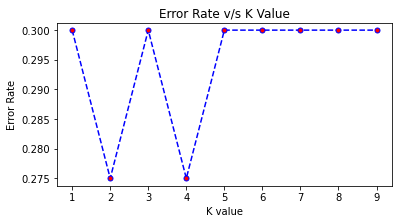

In [19]:
from sklearn.neighbors import KNeighborsClassifier
error = []
 
for i in range(1, 10):
     
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i))
    
plt.figure(figsize =(6, 3))
plt.plot(range(1, 10), error, color ='blue',linestyle ='dashed', marker ='o',markerfacecolor ='red', markersize = 5)
 
plt.title('Error Rate v/s K Value')
plt.xlabel('K value')
plt.ylabel('Error Rate')

**Findings:**

* Best K value is 4

In [20]:
model_knn = KNeighborsClassifier(n_neighbors=4)

In [21]:
model_knn.fit(x_train,y_train)

KNeighborsClassifier(n_neighbors=4)

In [22]:
y_pred = model_knn.predict(x_test)

In [23]:
print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.95
Confusion Matrix:
 [[56  2]
 [ 2 20]]
Classification Report:
               precision    recall  f1-score   support

           0       0.97      0.97      0.97        58
           1       0.91      0.91      0.91        22

    accuracy                           0.95        80
   macro avg       0.94      0.94      0.94        80
weighted avg       0.95      0.95      0.95        80



####  Naïve Bayes Model

In [24]:
from sklearn.naive_bayes import GaussianNB  
model_nb = GaussianNB()  
model_nb.fit(x_train, y_train)  

GaussianNB()

In [25]:
y_pred = model_nb.predict(x_test)  

In [26]:
print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.925
Confusion Matrix:
 [[56  2]
 [ 4 18]]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.97      0.95        58
           1       0.90      0.82      0.86        22

    accuracy                           0.93        80
   macro avg       0.92      0.89      0.90        80
weighted avg       0.92      0.93      0.92        80



#### SVM Model

In [27]:
from sklearn.svm import SVC
model_svc = SVC(kernel='linear', C=1, gamma='auto')
model_svc.fit(x_train,y_train)

SVC(C=1, gamma='auto', kernel='linear')

In [28]:
y_pred = model_svc.predict(x_test)

In [29]:
print('Accuracy Score:\n',accuracy_score(y_test, y_pred))
print('Confusion Matrix:\n',confusion_matrix(y_test, y_pred))
print('Classification Report:\n',classification_report(y_test,y_pred))

Accuracy Score:
 0.9125
Confusion Matrix:
 [[57  1]
 [ 6 16]]
Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.98      0.94        58
           1       0.94      0.73      0.82        22

    accuracy                           0.91        80
   macro avg       0.92      0.86      0.88        80
weighted avg       0.91      0.91      0.91        80



### Model Evaluation

|Model|Accuracy Score|
|-|-|
|Logistic Regression|0.9125|
|**KNN**|**0.95**|
|Naïve Bayes|0.925|
|SVM|0.9125|

**Result:**

* **K-Nearest Neighbour Algorithm** is the best model with accuracy **95%**, when compared to other 3 classifier models.

##### Jibin K Joy, ML & AI, KKEM August 2022 Batch